In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [1]:
# %   COURSE: Neural signal processing and analysis: Zero to hero
# %  SESSION: Problem set: Simulating and visualizing data
# %  TEACHER: Mike X Cohen, sincxpress.com

In [ ]:
# %%% INSTRUCTIONS:
# % The goal of this assignment is to simulate time series data
# % that can be used to test time-series analysis methods.
# % For each section below: 
# %   1) Complete the MATLAB code
# %   2) Put the data into the EEG structure
# %      - Make sure all relevant fields are accurate (EEG.data, EEG.pnts, EEG.trials, EEG.srate, EEG.nbchan, EEG.times)
# %   3) Plot the data using the function plot_simEEG()

# % NOTE 1: Obviously, you need to fill in missing code.
# % NOTE 2: Be careful, because sometimes there is incorrect code that doesn't produce coding errors.
# %         Remember: Visualize, and visualize often.

# %% 1) white noise

# % The goal of this exercise is to gain basic familiarity with data simulations.
# % You will create a dataset of white noise and plot it.

# % specify EEG parameters

In [2]:
EEG = {'srate': 500, # sampling rate in Hz
       'pnts': 1000,
       'trials': 100,
       'nbchan': 64}

In [6]:
# % time vector
EEG['times'] = np.arange(0, EEG['pnts'])/EEG['srate']

In [40]:
# % create data as white noise
mean_noise = 0
var_noise = 4
EEG['data_normal'] = np.random.normal(
    loc=mean_noise, 
    scale=var_noise, 
    size=(EEG['nbchan'], EEG['pnts'], EEG['trials']))

EEG['data_uniform'] = np.random.random(
    size=(EEG['nbchan'], EEG['pnts'], EEG['trials']))

In [ ]:
# % the function below takes at least one argument (EEG),
# % and optionally a second argument (channel number),
# % and optionally a third argument (figure number)
plot_simEEG(EEG,2,3)

In [41]:
def plot_EEG(eeg_data, channel_n=0, trial_n=0):
    
    plt.figure(figsize=(10,4))
    plt.plot(eeg_data[channel_n, trial_n, :])
    plt.title(f'EEG signal for {channel_n+1} channel and {trial_n+1} trial')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

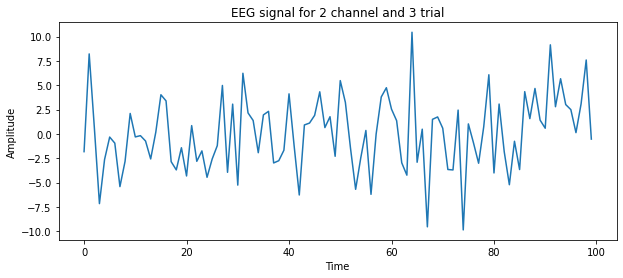

In [42]:
# white noise
plot_EEG(eeg_data=EEG['data_normal'],
         channel_n=1,
         trial_n=2)

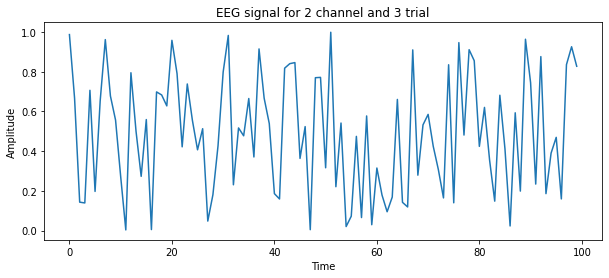

In [43]:
# uniform noise
plot_EEG(eeg_data=EEG['data_uniform'],
         channel_n=1,
         trial_n=2)

In [ ]:
# %%% Question: What is the effect of noise amplitude on the 
# %             resulting graphs?
# % 
# %%% Question: Do the results change if you use normally distributed
# %             vs. uniformly distributed noise?
# % 
# %%% Question: Are the results different for different channels? Why or why not?

In [44]:
# %% 2) pink noise

# % The goal of this exercise is to extend the previous exercise to "pink" noise.
# % You should create the noise separately on each trial

# % feel free to change some parameters compared to above...
# EEG.nbchan = 4 

# % the key parameter of pink noise is the exponential decay (ed)
ed = 50 # % try different values!

# % initialize EEG data as a zeros matrix
EEG['data_pink'] = np.zeros(shape=(EEG['nbchan'], EEG['pnts'], EEG['trials']))

In [51]:
for chan in range(EEG['nbchan']):
    for trial in range(EEG['trials']):
        ampl_spectrum = np.random.random(size=(1, EEG['pnts'])) * np.exp(-(np.arange(EEG['pnts'])/ed))
        
        fc = ampl_spectrum * np.exp(complex(0,1)*2* np.pi * np.random.random(size=ampl_spectrum.shape))
        
#         print(fc.shape)
        
        EEG['data_pink'][chan,:,trial] = np.fft.ifft(fc).real

In [ ]:
# for chani=1:EEG.nbchan
#     for triali=1:EEG.trials
        
#         %%% Note about the code below: This involves creating the signal first in the frequency domain, 
#         %   then transforming it into the time domain. Don't worry if you don't understand the details
#         %   (you'll learn them tomorrow!); try to plot each step to get a basic idea.
        
#         % generate one-sided 1/f amplitude spectrum
#         as = rand(1,EEG.pnts) .* exp(-(0:EEG.pnts-1)/ed);
        
#         % Fourier coefficients as amplitudes times random phases
#         fc = as .* exp(1i*2*pi*rand(size(as)));
        
#         % inverse Fourier transform to create the noise
#         EEG.data(chani,:,triali) = real(ifft(fc));
#     end
# end

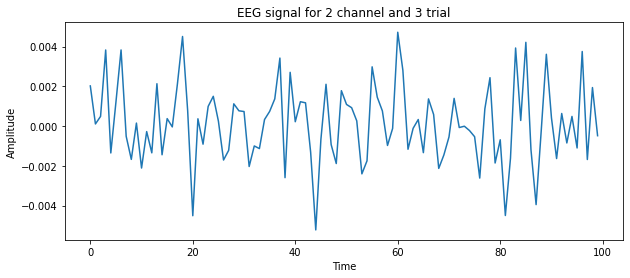

In [52]:
# pi noise
plot_EEG(eeg_data=EEG['data_pink'],
         channel_n=1,
         trial_n=2)

In [ ]:
# %%% Question: Which looks more like real EEG data: white or pink noise?
# %             Why do you think this is?
# % 
# %%% Question: Which values of variable 'ed' make the data look most like real EEG data?